# Introduction to the Insight Toolkit (ITK)

### Learning Objectives

* Learn how to **run** cells in **a Jupyter Notebook**
* Run a segmentation example that demonstrates **ITK**'s ability to provide **insight into images**
* Understand the **purpose and capabilities** of the toolkit

## Jupyter Notebooks

These are [Jupyter Notebooks](https://jupyter.org/), an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text.

To run cells in the notebook, press *shift + enter*.

For more information, see the [Notebook Help](https://nbviewer.jupyter.org/github/ipython/ipython/blob/3.x/examples/Notebook/Index.ipynb)

## Insight Into Images

In [1]:
import itk

from packaging.version import parse
from importlib.metadata import version

if parse(version('itk')) < parse('5.3'):
    raise ValueError("ITK greater than version 5.3.0 is required for this notebook")

In [2]:
from itkwidgets import view


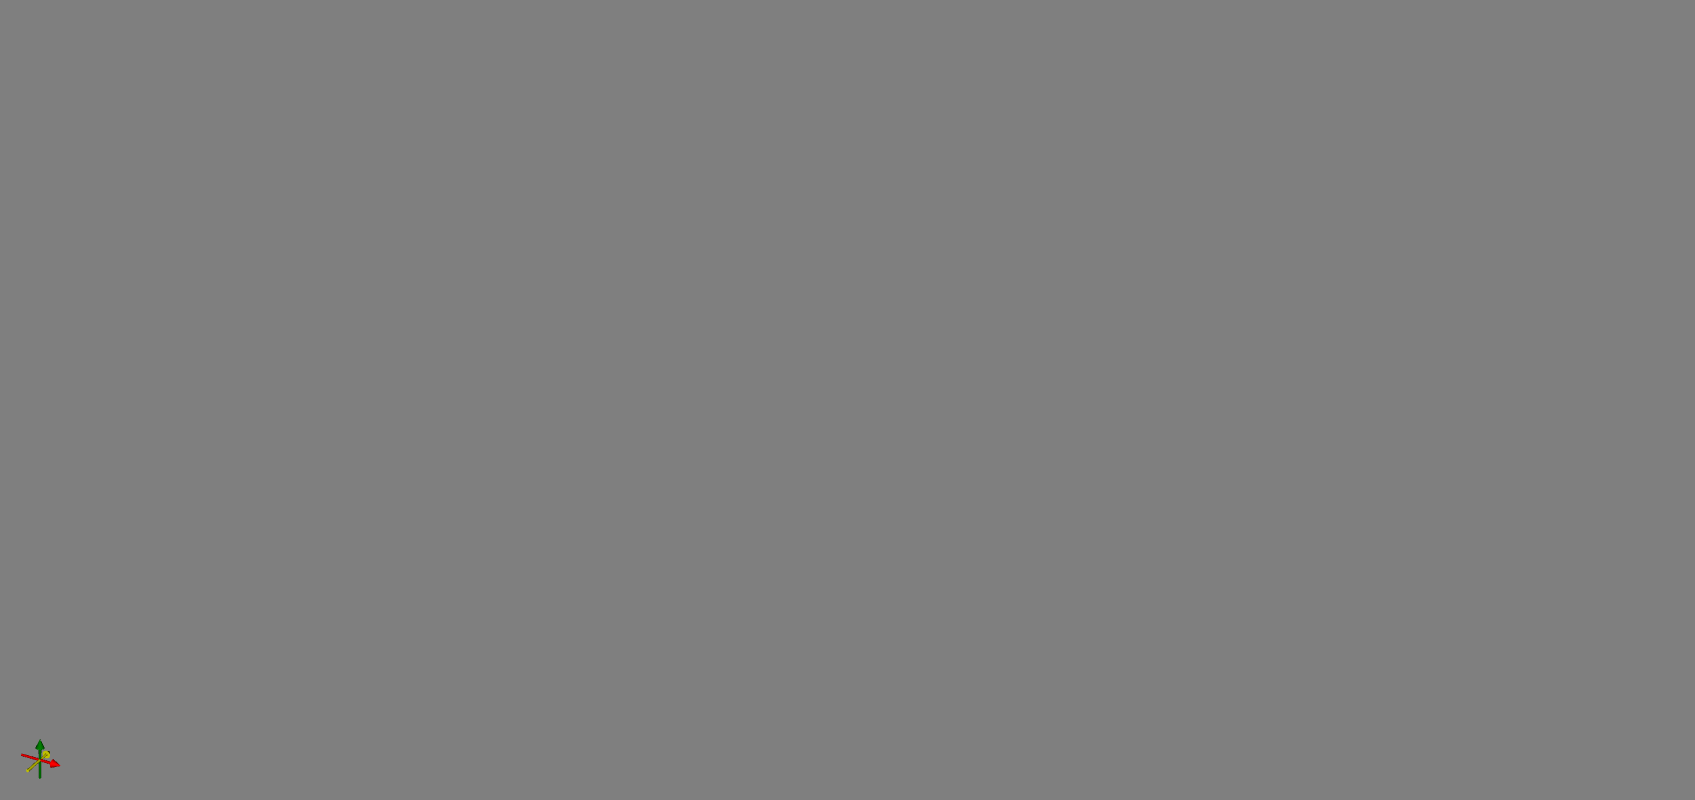
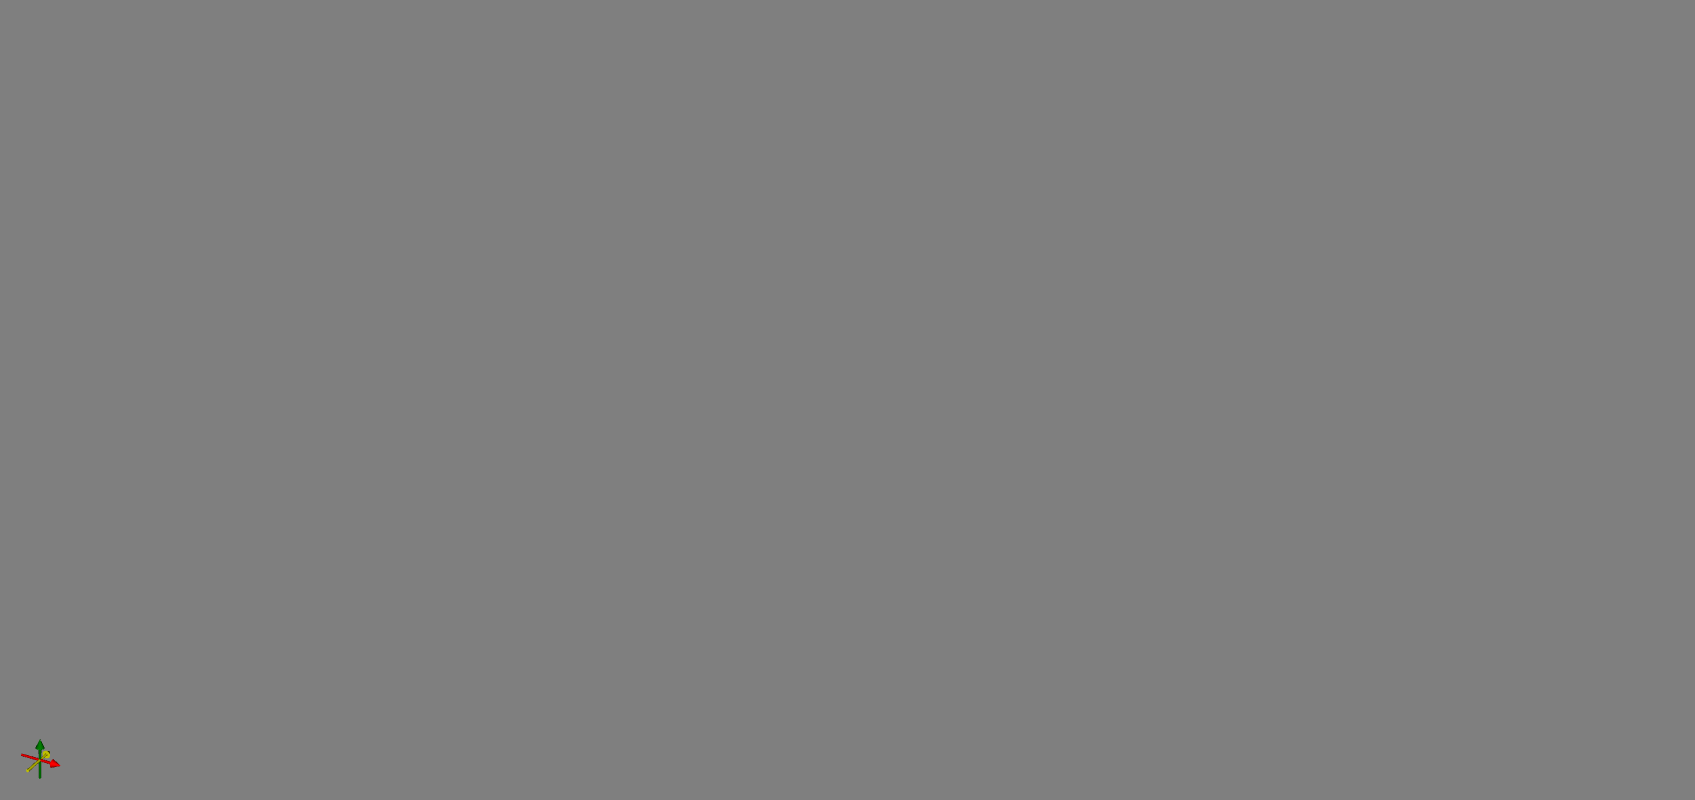

<IPython.core.display.Javascript object>

In [3]:
file_name = "data/brainweb165a10f17.mha"
image = itk.imread(file_name, itk.ctype("float"))
view(image, gradient_opacity=0.5)


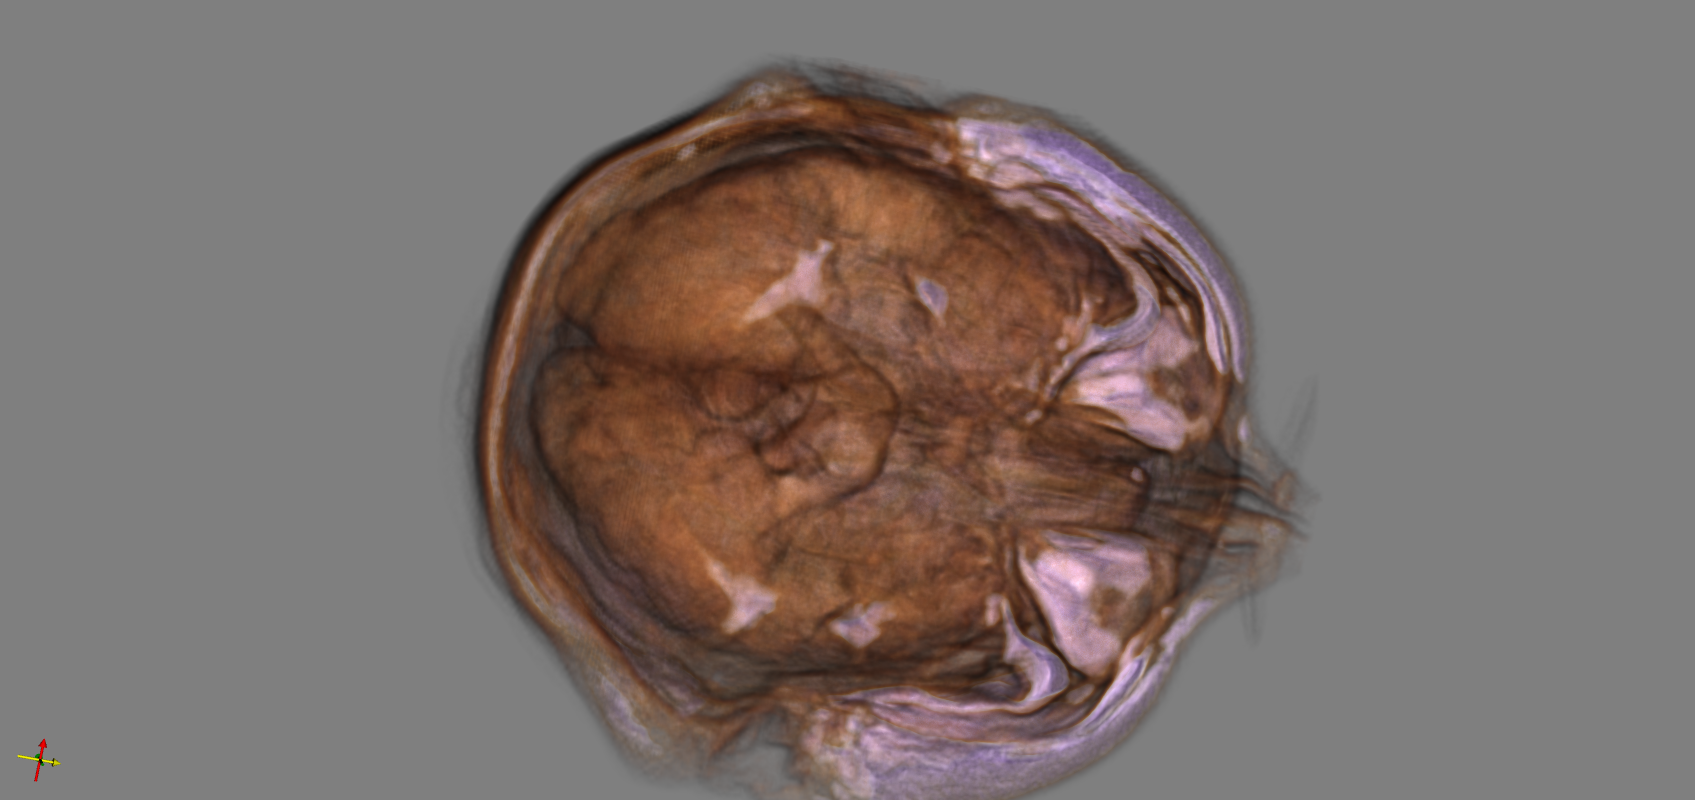
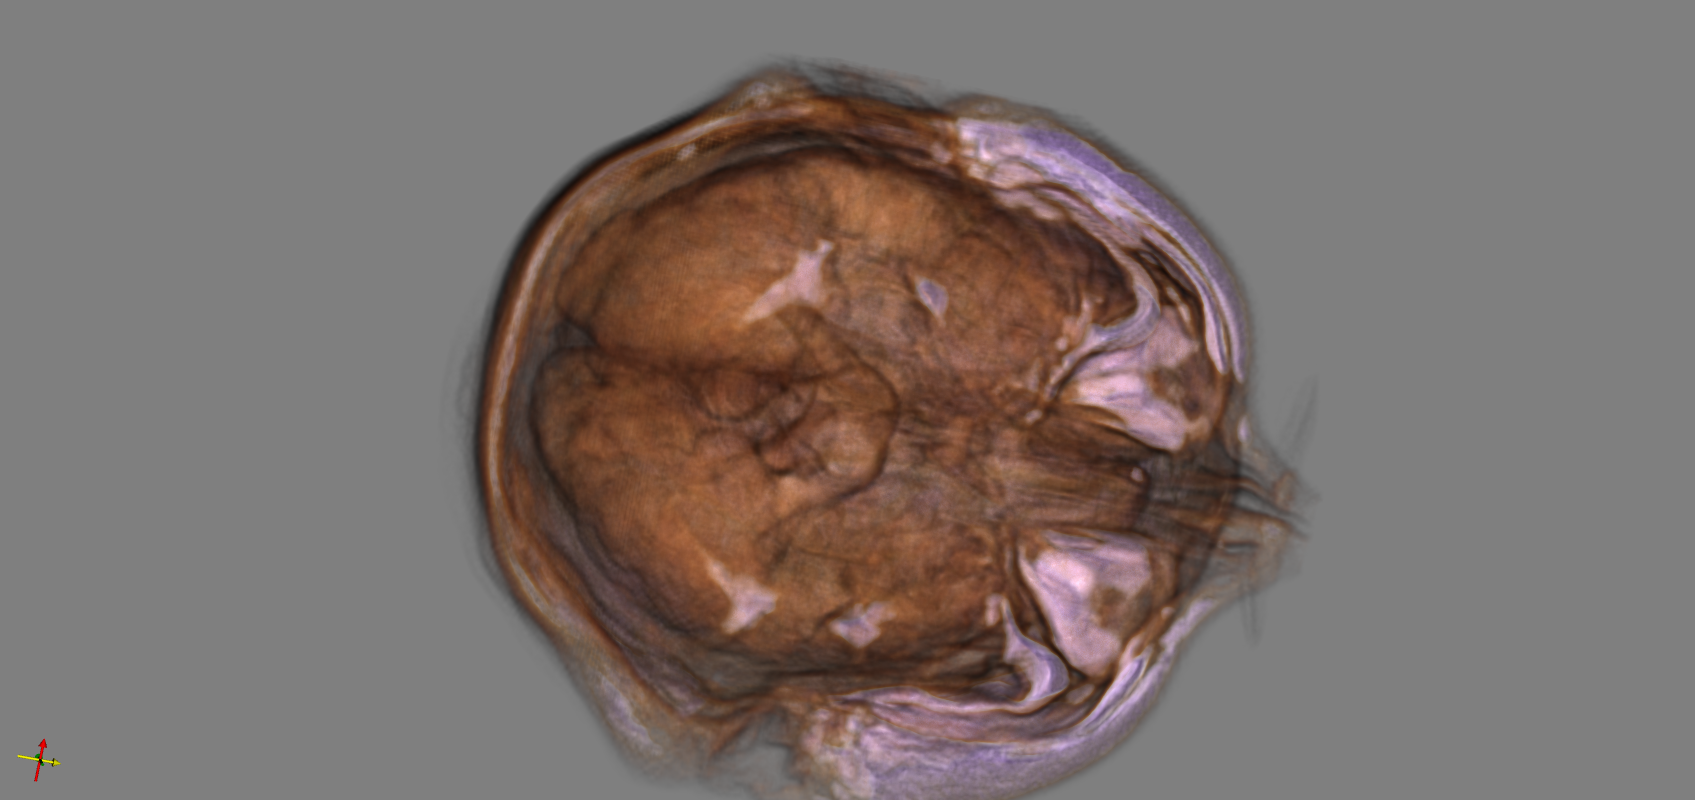

<IPython.core.display.Javascript object>

In [4]:
# Smooth the image
smoothed = itk.curvature_flow_image_filter(
    image, number_of_iterations=6, time_step=0.005
)
view(smoothed, gradient_opacity=0.5)

In [5]:
# Segment the white matter with a 3D region-growing algorithm
confidence_connected = itk.ConfidenceConnectedImageFilter.New(smoothed)
confidence_connected.SetMultiplier(2.5)
confidence_connected.SetNumberOfIterations(5)
confidence_connected.SetInitialNeighborhoodRadius(2)
confidence_connected.SetReplaceValue(255)

confidence_connected.AddSeed([118, 133, 92])
confidence_connected.AddSeed([63, 135, 94])
confidence_connected.AddSeed([63, 157, 90])
confidence_connected.AddSeed([111, 150, 90])
confidence_connected.AddSeed([111, 50, 88])
confidence_connected.Update()


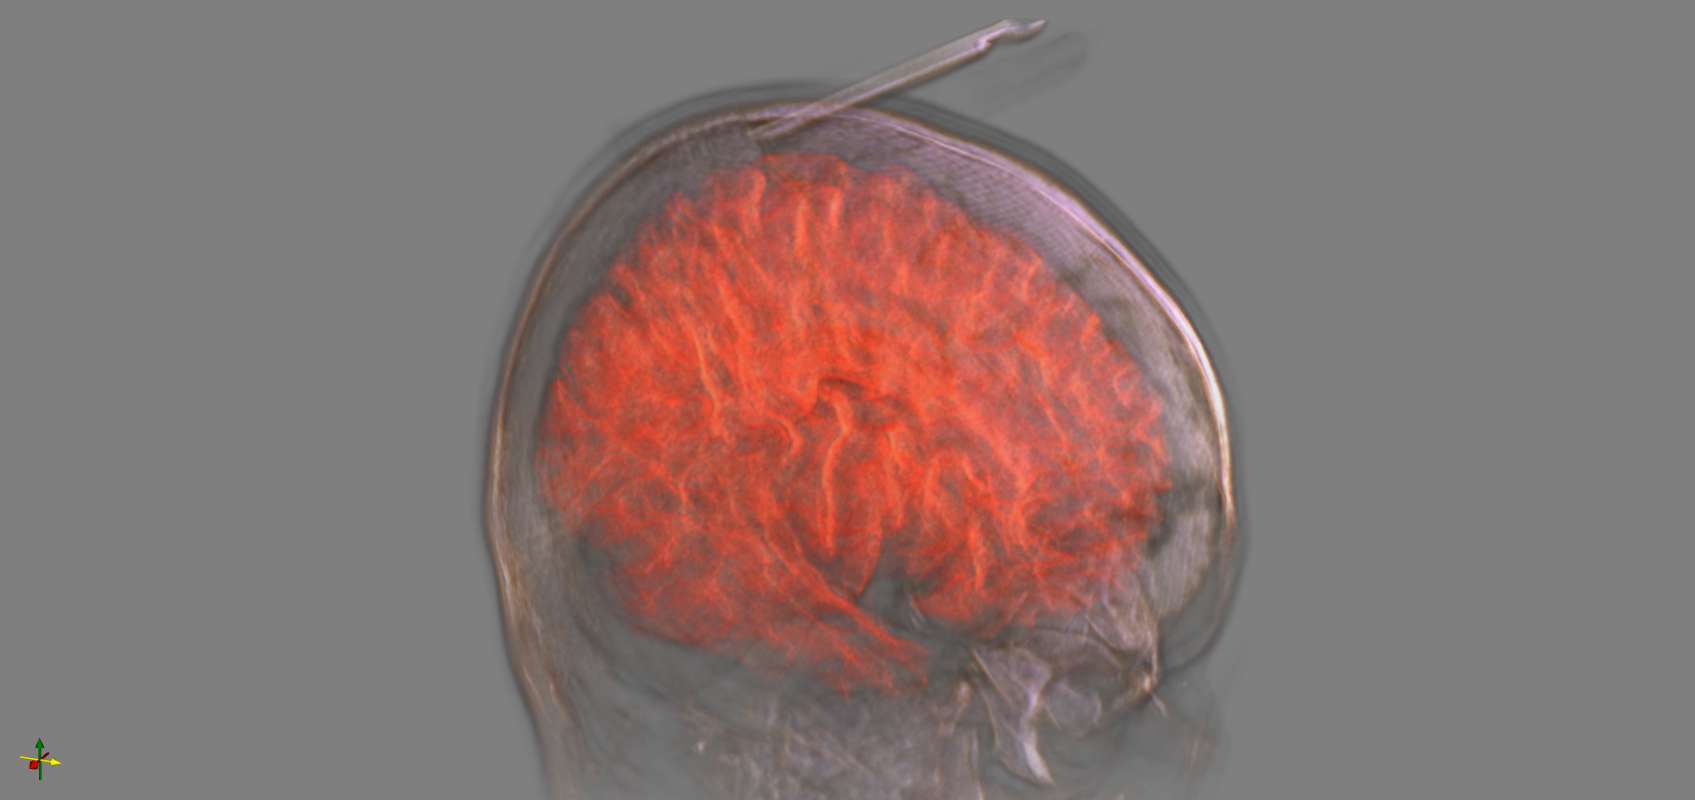
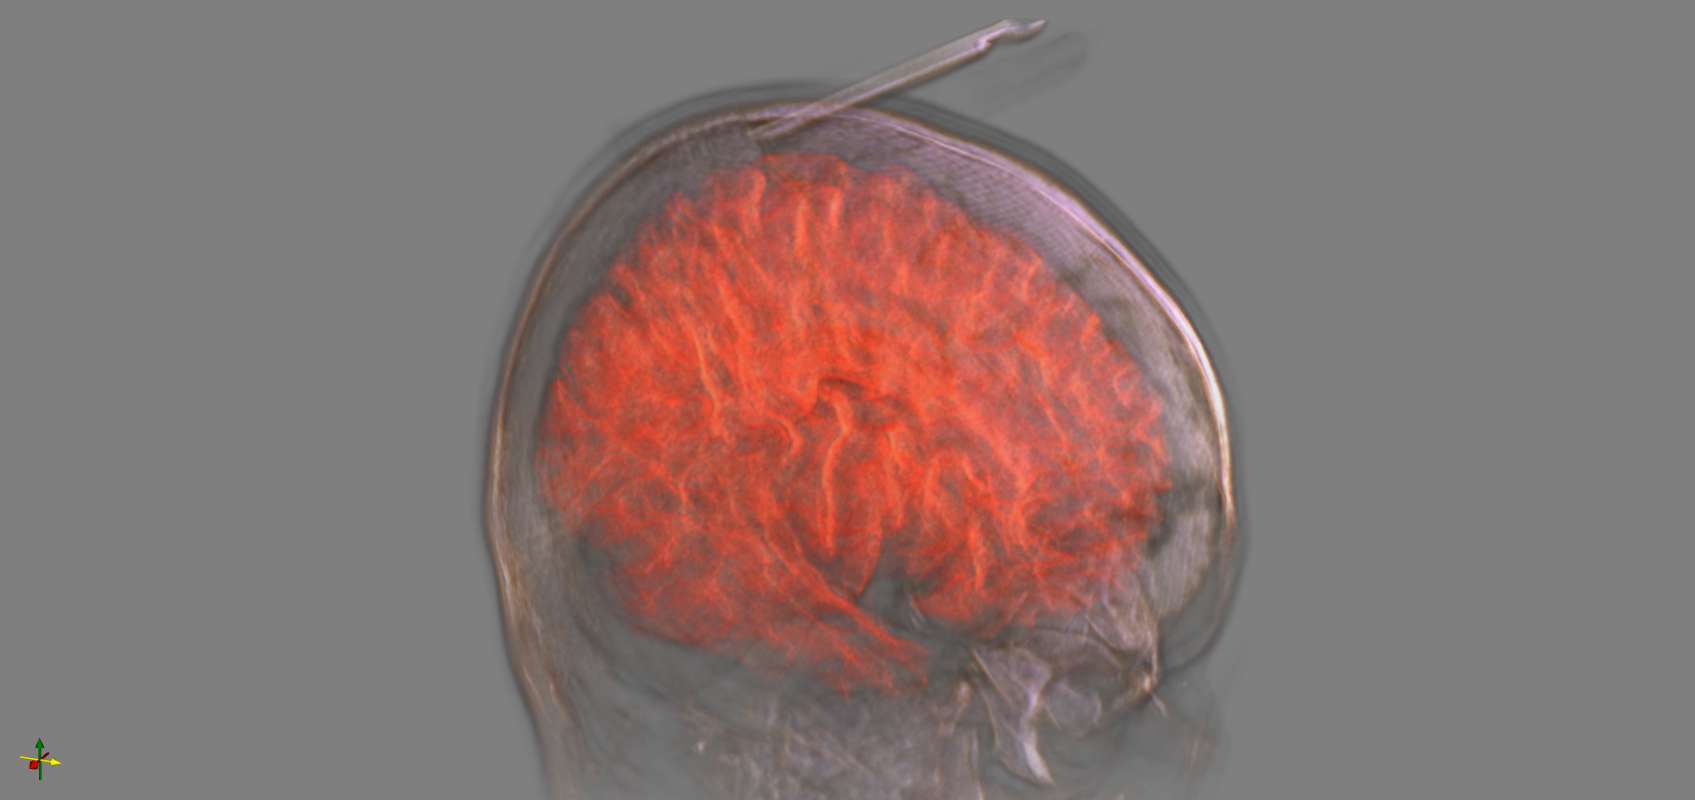

<IPython.core.display.Javascript object>

In [7]:
view(
    image=smoothed,
    label_image=confidence_connected.GetOutput(),
    gradient_opacity=0.5
)

## History of ITK

### Insight into Images

![Visible Human Head Rendering](data/VisibleHumanHeadRender.png)

http://itk.org

### History

In 1999, the US National Institute of Health’s (NIH) National Library of Medicine (NLM) started a project to support the Visible Human Project.

![Visible Human Logo](data/VisibleHumanLogo.png)

![Visible Human Slice](data/VisibleHumanSlice.png)


### Goals

* Collect best-of-the-best image analysis algorithms for reproducible science.
* Provide a software resource for teaching medical image analysis algorithms.
* Establish a foundation for future research.
* Support commercial applications.
* Create conventions for future work.
* Grow a self-sustaining community of software users and developers.

### Continued Development

* Development has progressed since 1999
* Contributions from over 267 developers
* Over 1.6 million lines of code
* Downloaded over 500,000 times

![ITK contributors](data/itk-contributors.png)

ITK contributors locations for the 4.8 and 4.9 releases.

## Features

### N-Dimensional Image Filtering

![Filtering](data/Filtering.png)

### Filtering Algorithms Classes

* Fast marching methods
* Convolution
* Image gradient
* Denoising
* Thresholding
* Mathematical morphology
* Smoothing
* Image features
* Image statistics
* Bias correction
* Image grid operations
* ....

### Segmentation

"Image segmentation is the process of partitioning a digital image into multiple segments, i.e. sets of pixels. The goal of segmentation is to simplify and/or change the representation of an image into something that is more meaningful and easier to analyze."

Source: [Wikipedia](https://en.wikipedia.org/wiki/Image_segmentation)

### Segmentation

![Segmentation](data/SegmentationLevelSet.png)

### Segmentation

![Segmentation](data/Segmentation1.png)

### Segmentation

![Segmentation](data/Segmentation2.png)

### Segmentation

![Segmentation](data/Segmentation3.png)

### Segmentation

![Segmentation](data/Segmentation4.png)

### Segmentation

![Segmentation](data/Segmentation5.png)

### Registration

"Image registration is the process of transforming different sets of data into one coordinate system. [...] Registration is necessary in order to be able to compare or integrate the data obtained from these different measurements."

Source: [Wikipedia](https://en.wikipedia.org/wiki/Image_registration)

### Registration

![Registration](data/Registration.png)

### Other Data Structures

* Mesh's
* Transforms's
* SpatialObject's
* Path's
* LabelMap's

![Mesh](data/Mesh.png)

![Transform](data/Transformation.png)

### ITK Resources

* ITK Software Guide: https://www.itk.org/ItkSoftwareGuide.pdf

* Discourse Discussion: https://discourse.itk.org

* Sphinx Examples: https://www.itk.org/ITKExamples

* `ITK/Examples/` directory in the ITK source code repository

* Doxygen: http://www.itk.org/Doxygen/html/index.html

* Kitware: https://www.kitware.com/

### Kitware, Inc


![Kitware ITK](data/KitwareITK.jpg)

![Kitware overview](data/KitwareOverview.jpg)

- Collaborative, Open Source, Scientific Software Development
- Carrboro, NC, near University of North Carolina-Chapel Hill, in the Research Triangle

### Enjoy ITK!